In [1]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [90]:
#데이터 정규화
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]),columns=data.columns[1:])
data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,0.038515,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,-0.709559,1.003205
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,0.038515,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,1.409326,1.003205
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,1.445548,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,1.409326,-0.996806
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,0.038515,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,1.409326,-0.996806
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,0.038515,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,-0.709559,-0.996806


# Part1

In [92]:
# Q1
Q1 = data.iloc[:,:29]
Q1.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,0.869481,1.032227,1.340882,1.403761,1.175582,1.325295,1.955336,-0.148794,0.703498,1.326973
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,-0.162523,-0.343261,-0.012509,-0.550597,-0.143489,0.229131,1.003057,0.804640,0.703498,-0.041346
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,-0.162523,-1.718749,1.340882,0.426582,-0.143489,0.229131,1.955336,-0.148794,-0.314475,-0.041346
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,-0.162523,1.032227,-0.012509,1.403761,-1.462561,1.325295,1.003057,-0.148794,-0.314475,1.326973
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,0.869481,-0.343261,-0.012509,1.403761,-0.143489,0.229131,1.955336,0.804640,0.703498,-0.041346


## Choose the number of the factors

In [93]:
cov_mat = np.cov(Q1.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.19281114e-01  1.98841790e-01  8.10814788e-02  6.08749730e-02
  -3.13566260e-01 -3.44706948e-01 -6.38994054e-01 -8.36445915e-02
   1.52609733e-01  4.04321314e-01  2.30588486e-02  2.52222402e-02
   2.19367367e-02  3.18194989e-02  1.88539423e-03 -6.47144489e-02
  -1.83600291e-01 -6.15533400e-02 -7.71445782e-02 -4.83661783e-02
   3.35101905e-02  1.24177514e-01  7.30072792e-02  6.77413817e-02
   1.22080887e-01 -1.42177396e-01 -3.31335544e-02  2.89067998e-02
   2.40199660e-02]
 [ 1.31300741e-02 -1.43673136e-01  4.62837887e-01 -3.25580347e-01
  -5.73746812e-03 -1.77216060e-01 -1.47469281e-01  8.74686405e-02
  -2.77158648e-01 -4.88477028e-03  6.17102435e-02 -7.09255586e-02
  -1.67138445e-02  2.97344897e-01  6.96265169e-02  9.24777219e-02
  -6.99704444e-02 -7.60154459e-02  1.35712091e-01  1.14392044e-01
  -2.82602220e-01 -1.69455033e-01  2.89324380e-02 -3.17866207e-01
  -1.38084243e-01  1.81705599e-01 -1.27369490e-01 -7.39883578e-02
  -2.89725847e-01]
 [-2.22658469e-01 -1.689

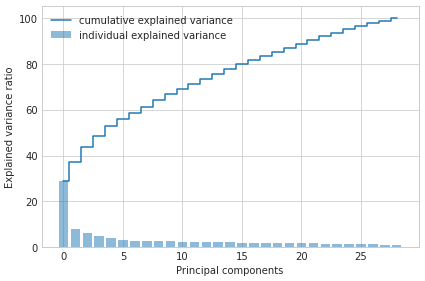

In [107]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(Q1.columns)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q1.columns)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [95]:
print(f'eigenvalue>1인 성분의 개수 {len([val for val in eig_vals if val>1])}')

eigenvalue>1인 성분의 개수 5


## FactorAnalysis

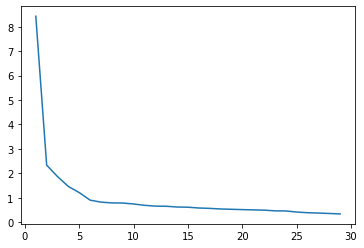

In [96]:
x = std_data.copy()
fa = FactorAnalyzer(5, method="ml", rotation="promax")
fa.fit(x)
efa = pd.DataFrame(fa.loadings_, index=x.columns)
#Eigenvalue Plotting
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)
plt.show()

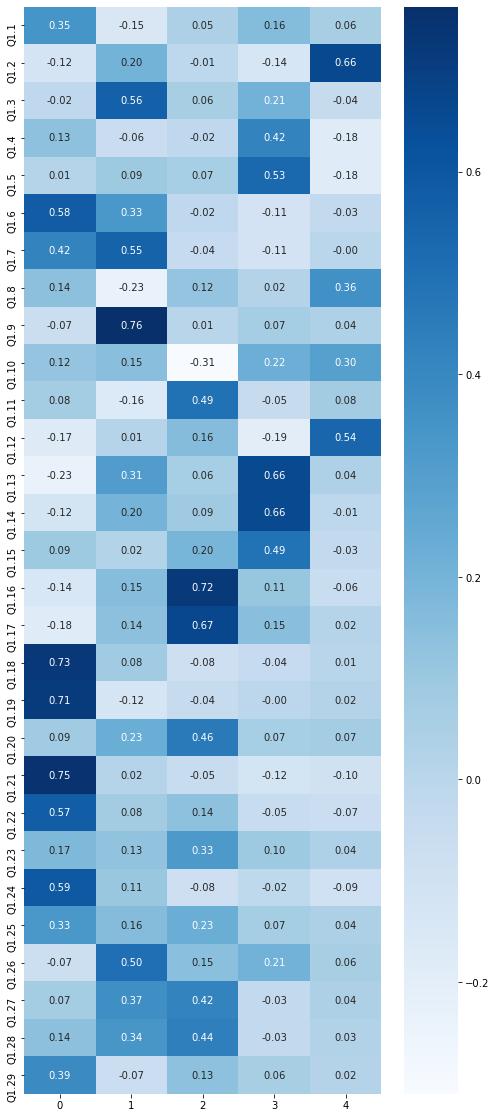

In [97]:
import seaborn as sns
plt.figure(figsize=(8,20))
sns.heatmap(efa, cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [98]:
groups = [[] for _ in range(5)]
for i in range(len(efa)):
    groups[np.argmax(efa.iloc[i])].append(efa.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

Group 0:
['Q1.1', 'Q1.6', 'Q1.18', 'Q1.19', 'Q1.21', 'Q1.22', 'Q1.24', 'Q1.25', 'Q1.29']
Group 1:
['Q1.3', 'Q1.7', 'Q1.9', 'Q1.26']
Group 2:
['Q1.11', 'Q1.16', 'Q1.17', 'Q1.20', 'Q1.23', 'Q1.27', 'Q1.28']
Group 3:
['Q1.4', 'Q1.5', 'Q1.13', 'Q1.14', 'Q1.15']
Group 4:
['Q1.2', 'Q1.8', 'Q1.10', 'Q1.12']


In [99]:
new_Q1 = pd.DataFrame(fa.transform(x), columns=['Active','Achievement','Confidence','Tech','Basic'])
new_Q1.head()

,Active,Achievement,Confidence,Tech,Basic
0,1.603504,1.925999,0.588489,2.312300,-1.403017
1,0.183254,1.290527,-0.175544,0.822054,-0.744389
2,-0.412127,1.290524,0.255103,1.639500,-1.675826
3,0.722554,0.272728,0.468732,1.946347,-0.437991
4,0.666488,1.556704,1.426527,1.788969,-0.697391


In [104]:
new_data = pd.concat([new_Q1, data.iloc[:,29:]],axis=1)

In [106]:
new_data.to_csv('data.csv', index=False)